The aim of this project is to evaluate the quality of generative models for data augmentation in medical domain.

We will augment data using both a Variational Auto-Encoder, an Auto-Encoder (a regular Auto-Encoder), and a Deep convolutional Generative Adversarial Network (DCGAN).

We will use these 3 kind of models to generate new data and evaluate the improvement of the final classification score compared with augmenting the training set and without. 

In order to confirm the impact of the data augmentation strategies,we apply them on 8 of the datasets from the MedMNIST Classification Decathlon (https://medmnist.github.io/). the data we use is as following:

- PathMNIST	Pathology	Multi-Class (9)	89,996	10,004	7,180

- DermaMNIST	Dermatoscope	Multi-Class (7)	7,007	1,003	2,005

- OCTMNIST	OCT	Multi-Class (4)	97,477	10,832	1,000

- PneumoniaMNIST	Chest X-ray	Binary-Class (2)	4,708	524	624

- BreastMNIST	Breast Ultrasound	Binary-Class (2)	546	78	156

- OrganMNIST_Axial	Abdominal CT	Multi-Class (11)	34,581	6,491	17,778

- OragnMNIST_Coronal	Abdominal CT	Multi-Class (11)	13,000	2,392	8,268

- OrganMNIST_Sagittal	Abdominal CT	Multi-Class (11)

We will not use: RetinaMNIST which is a regression oriented dataset and ChestMNIST which is a multi-label dataset

- RetinaMNIST	Fundus Camera	Ordinal Regression (5)	1,080	120	400

- ChestMNIST	Chest X-ray	Multi-Label (14) Binary-Class (2)	78,468	11,219	22,433


First import the important libraries that will be used.

In [1]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import time

from IPython import display

#Load and prepare the dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
path_breast = "/content/drive/MyDrive/medmnist/breastmnist.npz"
path_derma = "/content/drive/MyDrive/medmnist/dermamnist.npz"
path_oct = "/content/drive/MyDrive/medmnist/octmnist.npz"
path_axial = "/content/drive/MyDrive/medmnist/organmnist_axial.npz"
path_coronal = "/content/drive/MyDrive/medmnist/organmnist_coronal.npz"
path_sagittal = "/content/drive/MyDrive/medmnist/organmnist_sagittal.npz"
path_mnist = "/content/drive/MyDrive/medmnist/pathmnist.npz"
path_pneumonia = "/content/drive/MyDrive/medmnist/pneumoniamnist.npz"

with np.load(path_breast) as data_breast:
  train_breast = data_breast['train_images.npy']
  train_breast_labels = data_breast['train_labels.npy']
  test_breast = data_breast['test_images.npy']
  test_breast_labels = data_breast['test_labels.npy']
  val_breast = data_breast['val_images.npy']
  val_breast_labels = data_breast['val_labels.npy']

with np.load(path_derma) as data_derma:
  train_derma = data_derma['train_images.npy']
  train_derma_labels = data_derma['train_labels.npy']
  test_derma = data_derma['test_images.npy']
  test_derma_labels = data_derma['test_labels.npy']
  val_derma = data_derma['val_images.npy']
  val_derma_labels = data_derma['val_labels.npy']

with np.load(path_oct) as data_oct:
  train_oct = data_oct['train_images.npy']
  train_oct_labels = data_oct['train_labels.npy']
  test_oct = data_oct['test_images.npy']
  test_oct_labels = data_oct['test_labels.npy']
  val_oct = data_oct['val_images.npy']
  val_oct_labels = data_oct['val_labels.npy']

with np.load(path_axial) as data_axial:
  train_axial = data_axial['train_images.npy']
  train_axial_labels = data_axial['train_labels.npy']
  test_axial = data_axial['test_images.npy']
  test_axial_labels = data_axial['test_labels.npy']
  val_axial = data_axial['val_images.npy']
  val_axial_labels = data_axial['val_labels.npy']

with np.load(path_coronal) as data_coronal:
  train_coronal = data_coronal['train_images.npy']
  train_coronal_labels = data_coronal['train_labels.npy']
  test_coronal = data_coronal['test_images.npy']
  test_coronal_labels = data_coronal['test_labels.npy']
  val_coronal = data_coronal['val_images.npy']
  val_coronal_labels = data_coronal['val_labels.npy']

with np.load(path_sagittal) as data_sagittal:
  train_sagittal = data_sagittal['train_images.npy']
  train_sagittal_labels = data_sagittal['train_labels.npy']
  test_sagittal = data_sagittal['test_images.npy']
  test_sagittal_labels = data_sagittal['test_labels.npy']
  val_sagittal = data_sagittal['val_images.npy']
  val_sagittal_labels = data_sagittal['val_labels.npy']

with np.load(path_mnist) as data_path:
  train_path = data_path['train_images.npy']
  train_path_labels = data_path['train_labels.npy']
  test_path = data_path['test_images.npy']
  test_path_labels = data_path['test_labels.npy']
  val_path = data_path['val_images.npy']
  val_path_labels = data_path['val_labels.npy']

with np.load(path_pneumonia) as data_Pneumonia:
  train_Pneumonia = data_Pneumonia['train_images.npy']
  train_Pneumonia_labels = data_Pneumonia['train_labels.npy']
  test_Pneumonia = data_Pneumonia['test_images.npy']
  test_Pneumonia_labels = data_Pneumonia['test_labels.npy']
  val_Pneumonia = data_Pneumonia['val_images.npy']
  val_Pneumonia_labels = data_Pneumonia['val_labels.npy']

# looking to the images of different data

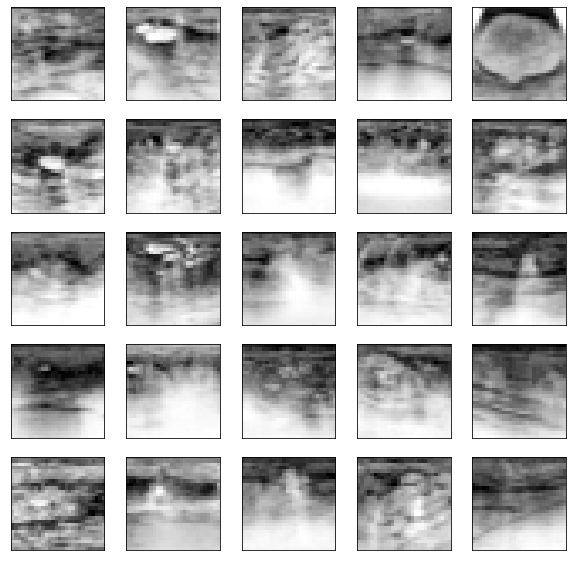

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_breast[i,:], cmap=plt.cm.binary)

plt.show()

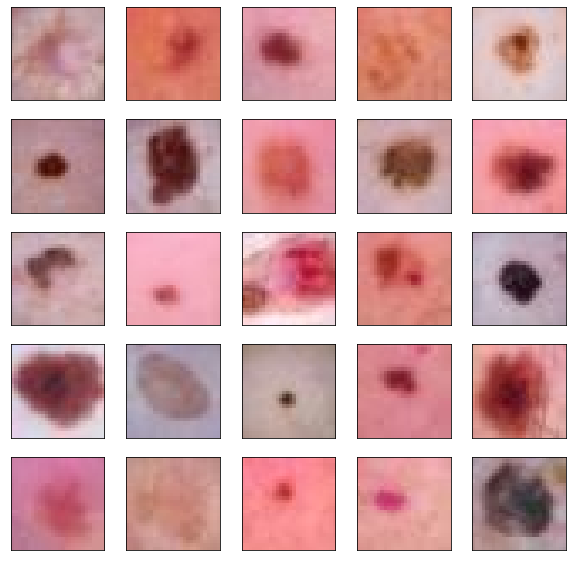

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_derma[i,:], cmap="gray")

plt.show()

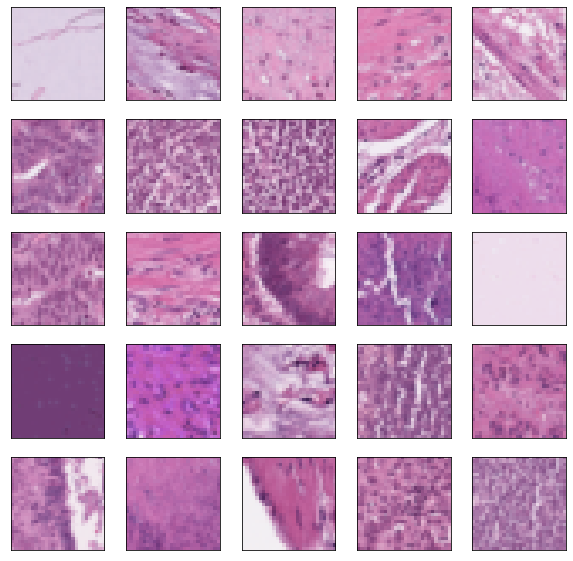

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_path[i,:], cmap="gray")

plt.show()

# looking for the shapes of our train set

In [7]:
print("shape of the train_breast data is:",np.shape(train_breast))
print("shape of the train_derma data is:",np.shape(train_derma))
print("shape of the train_oct data is:",np.shape(train_oct))
print("shape of the train_organ_axial data is:",np.shape(train_axial))
print("shape of the train_organ_coronal data is:",np.shape(train_coronal))
print("shape of the train_organ_sagittal data is:",np.shape(train_sagittal))
print("shape of the train_path data is:",np.shape(train_path))
print("shape of the train_Pneumonia data is:",np.shape(train_Pneumonia))

shape of the train_breast data is: (546, 28, 28)
shape of the train_derma data is: (7007, 28, 28, 3)
shape of the train_oct data is: (97477, 28, 28)
shape of the train_organ_axial data is: (34581, 28, 28)
shape of the train_organ_coronal data is: (13000, 28, 28)
shape of the train_organ_sagittal data is: (13940, 28, 28)
shape of the train_path data is: (89996, 28, 28, 3)
shape of the train_Pneumonia data is: (4708, 28, 28)


# BreastMnist Data
For now let us just focus on the first dataset

In [8]:
# reshaping the data
train_breast = train_breast.reshape(train_breast.shape[0], 28, 28, 1).astype('float32')
train_breast = (train_breast - 127.5) / 127.5       # Normalize the images to [-1, 1]
val_breast = val_breast.reshape(val_breast.shape[0], 28, 28, 1).astype('float32')
val_breast = (val_breast - 127.5) / 127.5       # Normalize the images to [-1, 1]
print(np.shape(train_breast))
print(np.shape(val_breast))

(546, 28, 28, 1)
(78, 28, 28, 1)


In [9]:
BUFFER_SIZE = 546
BATCH_SIZE = 256

In [10]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_breast).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_breast, test_breast_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_dataset, type(train_dataset))

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32> <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [11]:
train_dataset

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

#creat the models

#Deep Convolutional GAN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0

KeyboardInterrupt: ignored

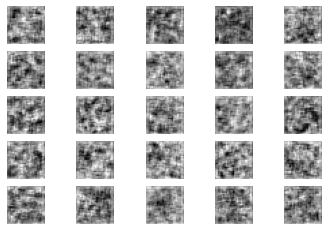

In [12]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        X_train = train_breast

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
        

if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=20000, batch_size=128, save_interval=1000)

  

#Denoising-Autoencoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Conv2DTranspose,
    Flatten,
    Dense
)
from tensorflow.keras import Sequential, Model
from tensorflow.keras.utils import to_categorical

import os
import random
import tensorflow as tf

%matplotlib inline

In [ ]:
encoder = Sequential([
    # convolution
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='SAME',
        use_bias=True,
        activation=LeakyReLU(alpha=0.2),
        name='conv1'
    ),
    # the input size is 28x28x32
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='pool1'
    ),
    # the input size is 14x14x32
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='SAME',
        use_bias=True,
        activation=LeakyReLU(alpha=0.2),
        name='conv2'
    ),
    # the input size is 14x14x32
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='encoding'
    )
    # the output size is 7x7x32
])

In [ ]:
# describe decoder pipeline

decoder = Sequential([
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        name='conv3',
        padding='SAME',
        use_bias=True,
        activation=LeakyReLU(alpha=0.2)
    ),
    # updampling, the input size is 7x7x32
    Conv2DTranspose(
        filters=32,
        kernel_size=3,
        padding='same',
        strides=2,
        name='upsample1'
    ),
    # upsampling, the input size is 14x14x32
    Conv2DTranspose(
        filters=32,
        kernel_size=3,
        padding='same',
        strides=2,
        name='upsample2'
    ),
    # the input size is 28x28x32
    Conv2D(
        filters=1,
        kernel_size=(3,3),
        strides=(1,1),
        name='logits',
        padding='SAME',
        use_bias=True
    )    
])


In [ ]:
# model class definition
class EncoderDecoderModel(Model):
    def __init__(self, is_sigmoid=False):
        super(EncoderDecoderModel, self).__init__()
        # assign encoder sequence
        self._encoder = encoder
        # assign decoder sequence 
        self._decoder = decoder
        self._is_sigmoid = is_sigmoid
        
    # forward pass
    def call(self, x):
        x = self._encoder(x)
        decoded = self._decoder(x)
        if self._is_sigmoid:
            decoded = tf.keras.activations.sigmoid(decoded)
        return decoded

In [ ]:
# add noise to the images for train and test
def distort_image(input_imgs, noise_factor=0.5):
    noisy_imgs = input_imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=input_imgs.shape) 
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    return noisy_imgs

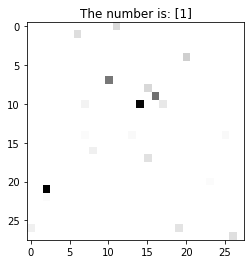

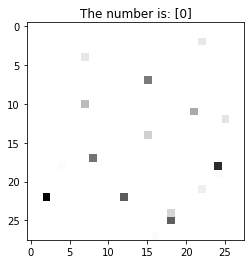

In [ ]:
# prepare distorted input data for training
train_noisy_imgs = distort_image(train_breast)

# prepare distorted input data for evaluation
test_noisy_imgs = distort_image(val_breast)

# plot distorted image example from training images
image_id_to_plot = 0
plt.imshow(tf.squeeze(train_noisy_imgs[image_id_to_plot]), cmap='Greys')
plt.title("The number is: {}".format(train_breast_labels[image_id_to_plot]))
plt.show()

# plot distorted image example from test images
plt.imshow(tf.squeeze(test_noisy_imgs[image_id_to_plot]), cmap='Greys')
plt.title("The number is: {}".format(val_breast_labels[image_id_to_plot]))
plt.show()
plt.close()

In [ ]:
# define custom target function for further minimization
def cost_function(labels=None, logits=None, name=None):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits, name=name)
    return tf.reduce_mean(loss)

In [ ]:
# funstion for train and val losses visualizations
def plot_losses(results):
    plt.plot(results.history['loss'], 'bo', label='Training loss')
    plt.plot(results.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and validation loss',fontsize=14)
    plt.xlabel('Epochs ',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
# instantiate the model
encoder_decoder_model = EncoderDecoderModel()

# training loop params
num_epochs = 20000
batch_size_to_set = 128

# training process params
learning_rate = 1e-5
# default number of workers for training process
num_workers = 2

# initialize the training configurations such as optimizer, loss function and accuracy metrics
encoder_decoder_model.compile(
    optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate),
    loss=cost_function,
    metrics=None
)

results = encoder_decoder_model.fit(
    train_noisy_imgs,
    train_breast,
    epochs=num_epochs,
    batch_size=batch_size_to_set,
    validation_data=(test_noisy_imgs, val_breast),
    workers=num_workers,
    shuffle=True
)

# visualize train and val losses
plot_losses(results)

Streaming output truncated to the last 5000 lines.
Epoch 4737/20000
18/18 [==============================] - 0s 8ms/step - loss: -68269912495.1579 - val_loss: -67724103680.0000
Epoch 4738/20000
18/18 [==============================] - 0s 7ms/step - loss: -68323799686.7368 - val_loss: -67799916544.0000
Epoch 4739/20000
18/18 [==============================] - 0s 7ms/step - loss: -68357749706.1053 - val_loss: -67875741696.0000
Epoch 4740/20000
18/18 [==============================] - 0s 7ms/step - loss: -68407722630.7368 - val_loss: -67951636480.0000
Epoch 4741/20000
18/18 [==============================] - 0s 7ms/step - loss: -68416863393.6842 - val_loss: -68027613184.0000
Epoch 4742/20000
18/18 [==============================] - 0s 7ms/step - loss: -68558943717.0526 - val_loss: -68103667712.0000
Epoch 4743/20000
18/18 [==============================] - 0s 7ms/step - loss: -68679668143.1579 - val_loss: -68179775488.0000
Epoch 4744/20000
18/18 [==============================] - 0s 7ms/st

In [ ]:
# instantiate the model with final sigmoid activation
encoder_decoder_model2 = EncoderDecoderModel(is_sigmoid=True)

# define the number of images to decode
img_num_to_decode = 10

# get 10 test reference images
test_imgs_data_decode = val_breast[:img_num_to_decode]

# get 10 distorted input test data and cast to float32 as tf layer's dtype is float32
test_noisy_imgs_decode = tf.cast(test_noisy_imgs[:img_num_to_decode], tf.float32)

decoded_images = encoder_decoder_model2(test_noisy_imgs_decode)

Original Images


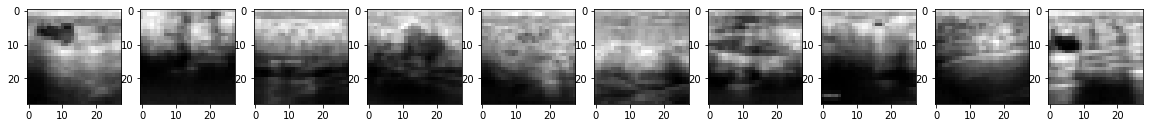

Noisy Images


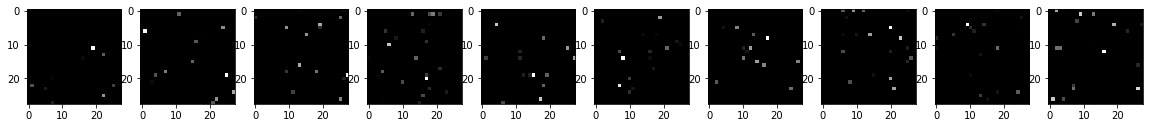

Reconstruction of Noisy Images


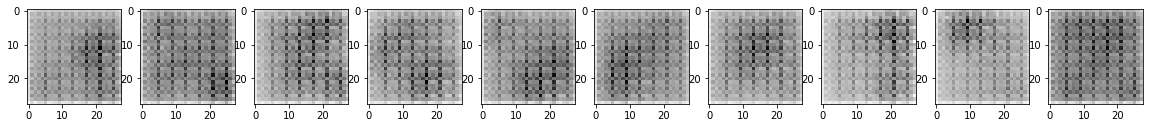

In [ ]:
# view initial, noisy and decoded images
plt.figure(figsize=(20, 4))
plt.title('Reconstructed Images')

print("Original Images")
for i in range(img_num_to_decode):
    plt.subplot(2, img_num_to_decode, i+1)
    plt.imshow(test_imgs_data_decode[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))

# plot the range of input noisy images
print("Noisy Images")
for i in range(img_num_to_decode):
    plt.subplot(2, img_num_to_decode, i+1)
    plt.imshow(test_noisy_imgs_decode[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))

# plot the range of decoded noisy images
print("Reconstruction of Noisy Images")
for i in range(img_num_to_decode):
    plt.subplot(2, img_num_to_decode, i+1)
    plt.imshow(decoded_images[i, ..., 0], cmap='gray')    
plt.show()    
plt.close()

#Variational Autoencoder

In [13]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [14]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [25]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [26]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)


In [31]:
def generate_and_save_images(model, epoch):
  mean, logvar = model.encode(train_breast)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 1], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [21]:
batch_size = 32
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

TypeError: ignored

InvalidArgumentError: ignored

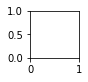

In [33]:
generate_and_save_images(model, 0)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_breast:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in val_breast:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch)

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

#Keras 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
latent_dim = 100 # dimension of the latent space
n_samples = 546 # size of our dataset
n_classes = 2
n_features = 2 # we use 2 features since we'd like to visualize them

In [ ]:
X = train_breast
y = train_breast_labels

# from sklearn.datasets import make_blobs

# X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=123)
# print('Size of our dataset:', len(train_breast))
# print('Number of features:', X.shape[1])
# print('Classes:', set(y))


In [ ]:
# Core layers
from keras.layers \
    import Activation, Dropout, Flatten, Dense, Input, LeakyReLU

# Normalization layers
from keras.layers import BatchNormalization

# Merge layers
from keras.layers import concatenate, multiply

# Embedding Layers
from keras.layers import Embedding

# Keras models
from keras.models import Model, Sequential

# Keras optimizers
from keras.optimizers import Adam, RMSprop, SGD

In [ ]:
n_features = 784

In [ ]:
def build_discriminator(optimizer=Adam(0.0002, 0.5)):
    '''
    Defines and compiles discriminator model.
    This architecture has been inspired by:
    https://github.com/eriklindernoren/Keras-GAN/blob/master/cgan/cgan.py
    and adapted for this problem.
    
    Params:
        optimizer=Adam(0.0002, 0.5) - recommended values
    '''
    features = Input(shape=(n_features,))
    label = Input(shape=(1,), dtype='int32')
    
    # Using an Embedding layer is recommended by the papers
    label_embedding = Flatten()(Embedding(n_classes, n_features)(label))
    
    # We condition the discrimination of generated features 
    inputs = multiply([features, label_embedding])
    
    x = Dense(512)(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    model = Model([features, label], valid)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

discriminator = build_discriminator()

Model: "model_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_65 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 1, 784)       1568        input_65[0][0]                   
__________________________________________________________________________________________________
input_64 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
flatten_25 (Flatten)            (None, 784)          0           embedding_11[0][0]               
___________________________________________________________________________________________

In [ ]:
def build_generator():
    '''
    Defines the generator model.
    This architecture has been inspired by:
    https://github.com/eriklindernoren/Keras-GAN/blob/master/cgan/cgan.py
    and adapted for this problem.
    '''
    
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,), dtype='int32')
    
    # Using an Embedding layer is recommended by the papers
    label_embedding = Flatten()(Embedding(n_classes, latent_dim)(label))
    
    # We condition the generation of features
    inputs = multiply([noise, label_embedding])
    
    x = Dense(256)(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(1024)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    
    features = Dense(n_features, activation='tanh')(x)
    
    model = Model([noise, label], features)
    model.summary()

    return model

generator = build_generator()

Model: "model_46"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_67 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 1, 100)       200         input_67[0][0]                   
__________________________________________________________________________________________________
input_66 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
flatten_26 (Flatten)            (None, 100)          0           embedding_12[0][0]               
___________________________________________________________________________________________

In [ ]:
def build_gan(generator, discriminator, optimizer=Adam(0.0002, 0.5)):
    '''
    Defines and compiles GAN model. It bassically chains Generator
    and Discriminator in an assembly-line sort of way where the input is
    the Generator's input. The Generator's output is the input of the Discriminator,
    which outputs the output of the whole GAN.
    
    Params:
        optimizer=Adam(0.0002, 0.5) - recommended values
    '''
    
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,))
    
    features = generator([noise, label])
    valid = discriminator([features, label])
    
    # We freeze the discriminator's layers since we're only 
    # interested in the generator and its learning
    discriminator.trainable = False
    
    model = Model([noise, label], valid)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
gan = build_gan(generator, discriminator)

Model: "model_47"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_68 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
model_46 (Functional)           (None, 784)          1493720     input_68[0][0]                   
                                                                 input_69[0][0]                   
__________________________________________________________________________________________________
model_45 (Functional)           (None, 1)            929313      model_46[0][0]            

In [ ]:
def get_random_batch(X, y, batch_size):
    '''
    Will return random batches of size batch_size
    
    Params:
        X: numpy array - features
        y: numpy array - classes
        batch_size: Int
    '''
    idx = np.random.randint(0, len(X))
    
    X_batch = X[idx:idx+batch_size]
    y_batch = y[idx:idx+batch_size]
    
    return X_batch, y_batch

In [ ]:
def train_gan(gan, generator, discriminator, 
              X, y, 
              n_epochs=1000, batch_size=32, 
              hist_every=10, log_every=100):
    '''
    Trains discriminator and generator (last one through the GAN) 
    separately in batches of size batch_size. The training goes as follow:
        1. Discriminator is trained with real features from our training data
        2. Discriminator is trained with fake features generated by the Generator
        3. GAN is trained, which will only change the Generator's weights.
        
    Params:
        gan: GAN model
        generator: Generator model
        discriminator: Discriminator model
        X: numpy array - features
        y: numpy array - classes
        n_epochs: Int
        batch_size: Int
        hist_every: Int - will save the training loss and accuracy every hist_every epochs
        log_every: Int - will output the loss and accuracy every log_every epochs
    
    Returns:
        loss_real_hist: List of Floats
        acc_real_hist: List of Floats
        loss_fake_hist: List of Floats
        acc_fake_hist: List of Floats
        loss_gan_hist: List of Floats
        acc_gan_hist: List of Floats
    '''
    
    half_batch = int(batch_size / 2)
    
    acc_real_hist = []
    acc_fake_hist = []
    acc_gan_hist = []
    loss_real_hist = []
    loss_fake_hist = []
    loss_gan_hist = []
    
    for epoch in range(n_epochs):
        
        X_batch, labels = get_random_batch(X, y, batch_size)
        
        # train with real values
        y_real = np.ones((X_batch.shape[0], 1))
        loss_real, acc_real = discriminator.train_on_batch([X_batch, labels], y_real)
        
        # train with fake values
        noise = np.random.uniform(0, 1, (labels.shape[0], latent_dim))
        X_fake = generator.predict([noise, labels])
        y_fake = np.zeros((X_fake.shape[0], 1))
        loss_fake, acc_fake = discriminator.train_on_batch([X_fake, labels], y_fake)
        
        y_gan = np.ones((labels.shape[0], 1))
        loss_gan, acc_gan = gan.train_on_batch([noise, labels], y_gan)
        
        if (epoch+1) % hist_every == 0:
            acc_real_hist.append(acc_real)
            acc_fake_hist.append(acc_fake)
            acc_gan_hist.append(acc_gan)
            loss_real_hist.append(loss_real)
            loss_fake_hist.append(loss_fake)
            loss_gan_hist.append(loss_gan)

        if (epoch+1) % log_every == 0:
            lr = 'loss real: {:.3f}'.format(loss_real)
            ar = 'acc real: {:.3f}'.format(acc_real)
            lf = 'loss fake: {:.3f}'.format(loss_fake)
            af = 'acc fake: {:.3f}'.format(acc_fake)
            lg = 'loss gan: {:.3f}'.format(loss_gan)
            ag = 'acc gan: {:.3f}'.format(acc_gan)

            print('{}, {} | {}, {} | {}, {}'.format(lr, ar, lf, af, lg, ag))
    return loss_real_hist, acc_real_hist, loss_fake_hist, acc_fake_hist, loss_gan_hist, acc_gan_hist

In [ ]:
loss_real_hist, acc_real_hist, \
loss_fake_hist, acc_fake_hist, \
loss_gan_hist, acc_gan_hist = train_gan(gan, generator, discriminator, X.reshape(X.shape[0],-1),y)

loss real: 0.031, acc real: 1.000 | loss fake: 0.070, acc fake: 1.000 | loss gan: 5.112, acc gan: 0.000
loss real: 0.164, acc real: 1.000 | loss fake: 0.291, acc fake: 0.781 | loss gan: 5.897, acc gan: 0.000
loss real: 0.483, acc real: 0.938 | loss fake: 0.386, acc fake: 0.688 | loss gan: 5.690, acc gan: 0.344
loss real: 0.260, acc real: 1.000 | loss fake: 0.635, acc fake: 0.500 | loss gan: 5.213, acc gan: 0.400
loss real: 0.267, acc real: 1.000 | loss fake: 0.408, acc fake: 0.594 | loss gan: 6.549, acc gan: 0.000
loss real: 0.491, acc real: 0.875 | loss fake: 0.623, acc fake: 0.312 | loss gan: 4.136, acc gan: 0.500
loss real: 0.265, acc real: 1.000 | loss fake: 0.447, acc fake: 0.531 | loss gan: 4.031, acc gan: 0.406
loss real: 0.345, acc real: 0.969 | loss fake: 0.419, acc fake: 0.469 | loss gan: 4.616, acc gan: 0.000
loss real: 0.471, acc real: 0.938 | loss fake: 0.481, acc fake: 0.531 | loss gan: 3.222, acc gan: 0.000
loss real: 0.461, acc real: 1.000 | loss fake: 0.596, acc fake: 

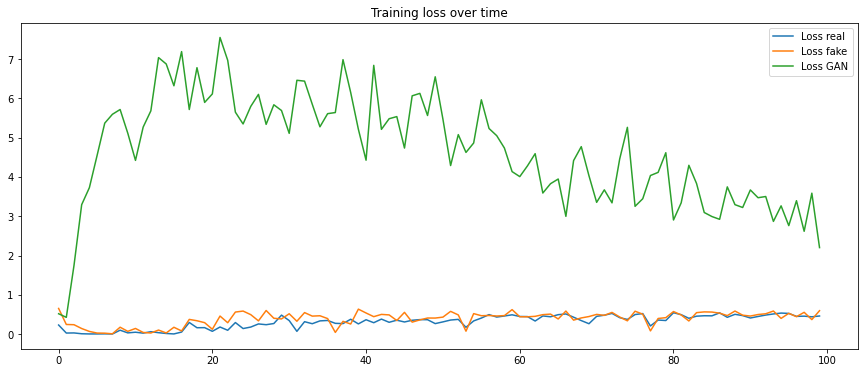

In [ ]:
ax, fig = plt.subplots(figsize=(15, 6))
plt.plot(loss_real_hist)
plt.plot(loss_fake_hist)
plt.plot(loss_gan_hist)
plt.title('Training loss over time')
plt.legend(['Loss real', 'Loss fake', 'Loss GAN'])

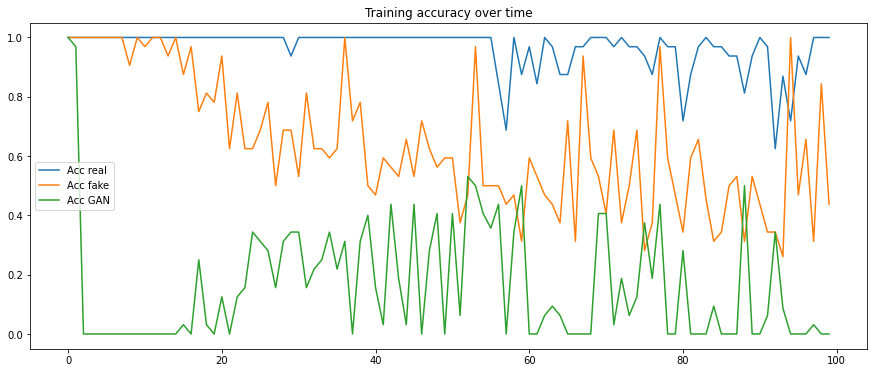

In [ ]:
ax, fig = plt.subplots(figsize=(15, 6))
plt.plot(acc_real_hist)
plt.plot(acc_fake_hist)
plt.plot(acc_gan_hist)
plt.title('Training accuracy over time')
plt.legend(['Acc real', 'Acc fake', 'Acc GAN'])

In [ ]:
def generate_samples(class_for, n_samples=20):
    '''
    Generates new random but very realistic features using
    a trained generator model
    
    Params:
        class_for: Int - features for this class
        n_samples: Int - how many samples to generate
    '''
    
    noise = np.random.uniform(0, 1, (n_samples, latent_dim))
    label = np.full((n_samples,), fill_value=class_for)
    return generator.predict([noise, label])

Our first model is DCGAN:

In [ ]:
#The generator

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [ ]:
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [ ]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

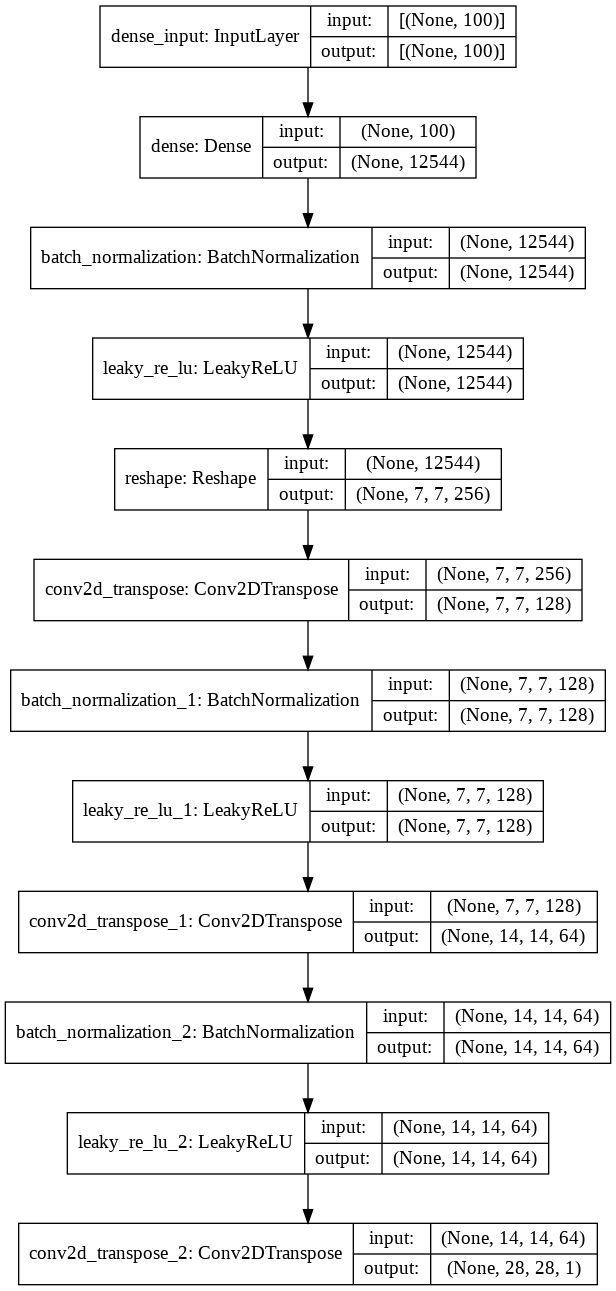

In [ ]:
Image(model_to_dot(generator, show_shapes=True).create_png())

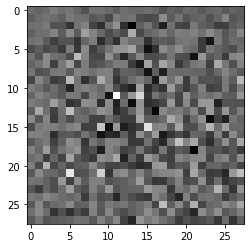

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
discriminator.trainable = False
discriminator.summary()
decision = discriminator(generated_image)
print (decision)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [ ]:
# from keras.models import Model
# from keras import Input

# gan_input = Input(shape=(100, ))
# gan_output = discriminator(generator(gan_input))
# gan = Model(gan_input, gan_output)

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 5
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      print(gen_loss)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

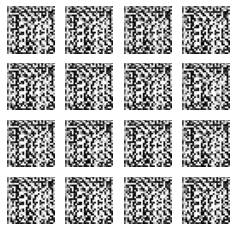

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs 

     |████████████████████████████████| 1.0MB 22.8MB/s 


(89996, 28, 28, 1)


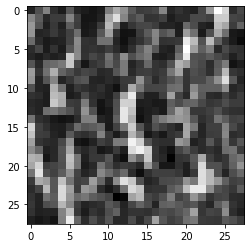

In [ ]:
import cv2
X_train = train_path
X_validation = val_path
X_test = test_path
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    img=img.astype(np.float32)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale_4d(X):
    X_gray = np.empty(X[:,:,:,0].shape)
    for i in range(len(X_gray)):
        X_gray[i] = grayscale(X[i])
    return(X_gray)

X_train_gray = grayscale_4d(X_train)
X_validation_gray = grayscale_4d(X_validation)
X_test_gray = grayscale_4d(X_test)

X_train_gray = np.reshape(X_train_gray,(X_train_gray.shape[0], 28, 28,1))
# X_validation_gray = np.reshape(X_validation_gray,(X_validation_gray.shape[0], 32, 32,1))
# X_test_gray = np.reshape(X_test_gray,(X_test_gray.shape[0], 32, 32,1))

X_train = np.copy(X_train_gray)
# X_validation = np.copy(X_validation_gray)
# X_test = np.copy(X_test_gray)

print(X_train.shape)
# print(X_validation.shape)
# print(X_test.shape)

image = X_train[1240].squeeze()

plt.figure()
plt.imshow(image,cmap='gray')
#print(signnames['SignName'][y_train[1240]])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d_9 (ZeroPaddin (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 8, 8, 64)        

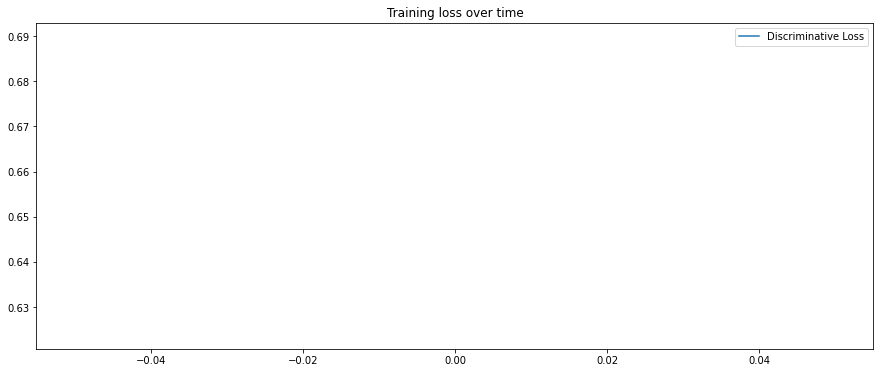

0 [D loss: 1.120876, acc.: 32.03%] [G loss: 0.656873]


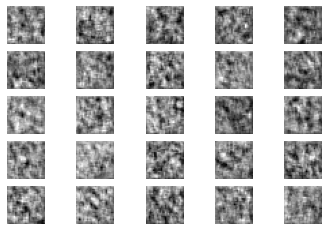

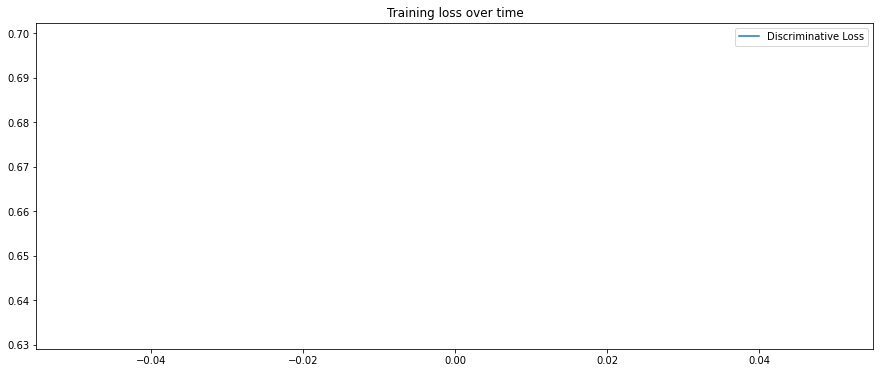

1 [D loss: 0.847957, acc.: 53.12%] [G loss: 0.665724]


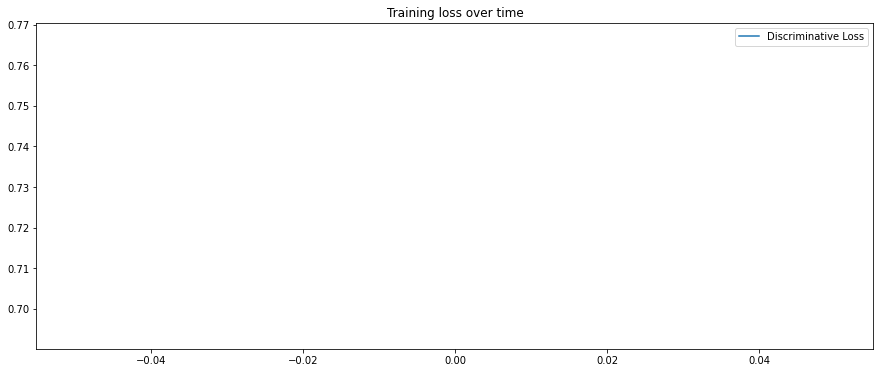

2 [D loss: 0.578345, acc.: 68.75%] [G loss: 0.730326]


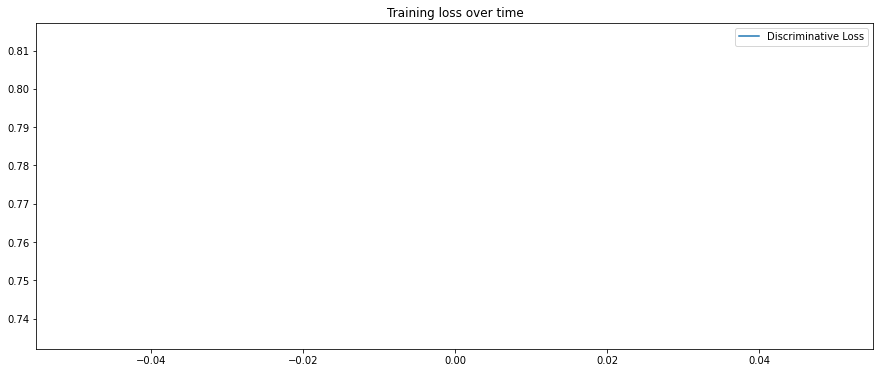

3 [D loss: 0.604736, acc.: 71.09%] [G loss: 0.774692]


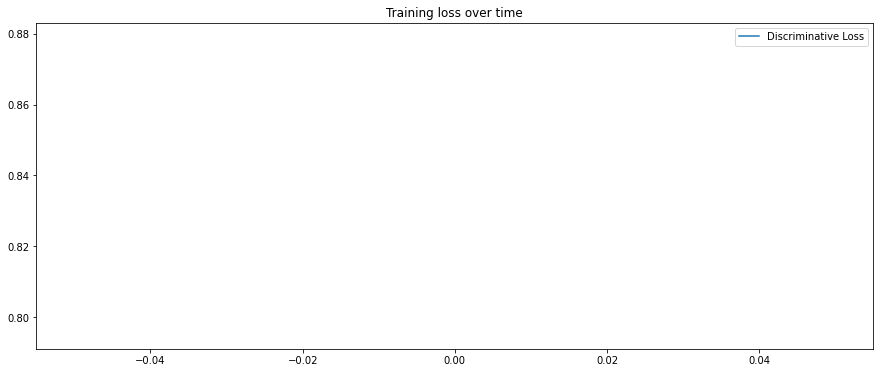

4 [D loss: 0.494105, acc.: 75.39%] [G loss: 0.837100]


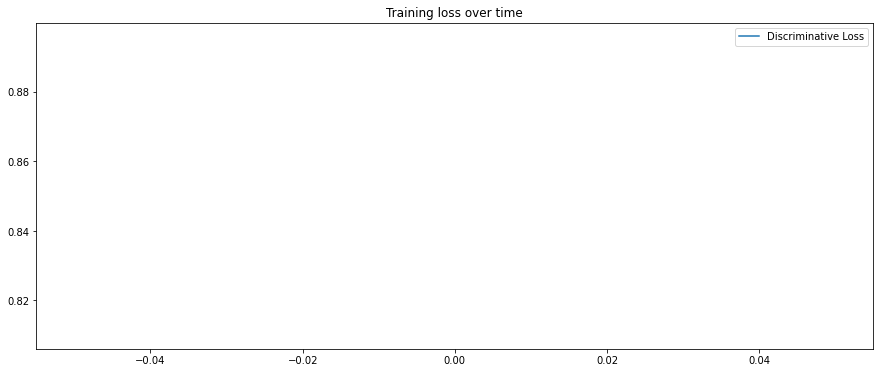

5 [D loss: 0.590313, acc.: 69.92%] [G loss: 0.853012]


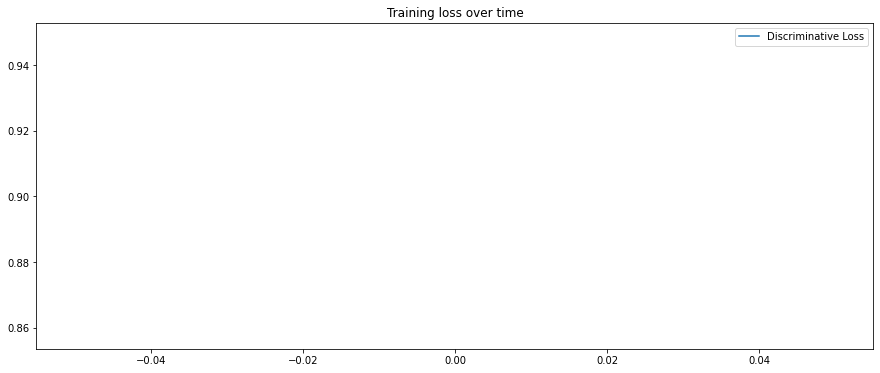

6 [D loss: 0.644867, acc.: 68.36%] [G loss: 0.903267]


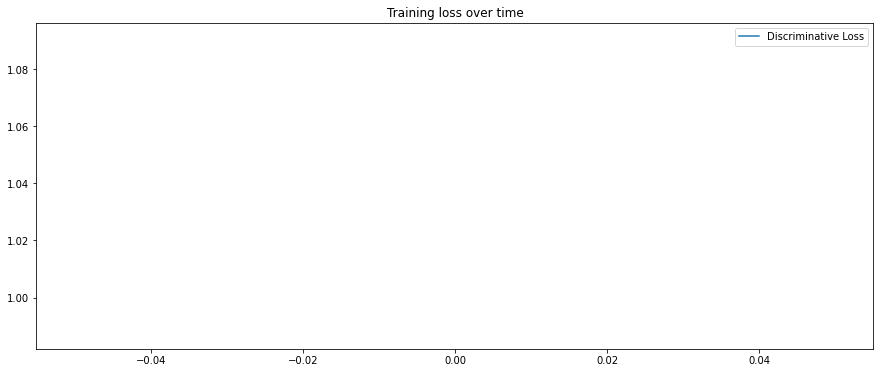

7 [D loss: 0.761293, acc.: 57.42%] [G loss: 1.039179]


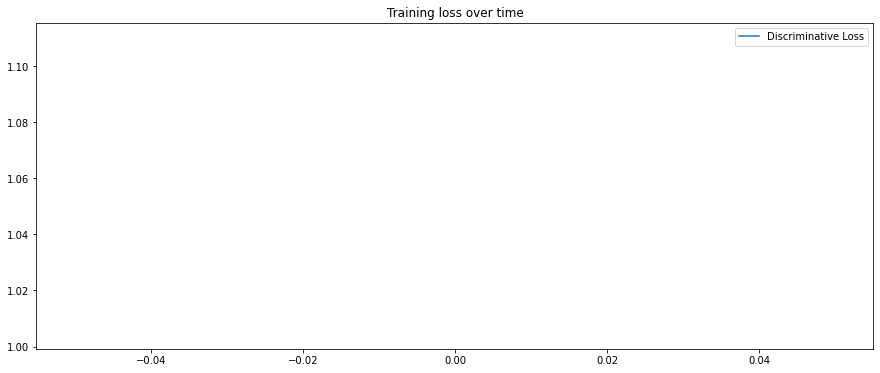

8 [D loss: 0.698582, acc.: 64.45%] [G loss: 1.057340]


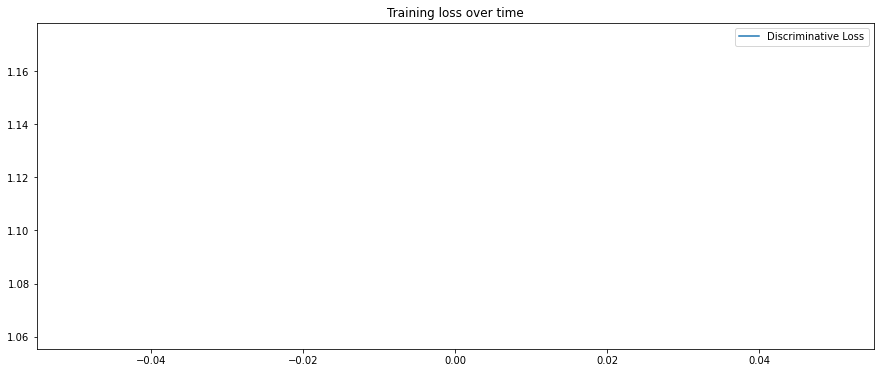

9 [D loss: 0.681908, acc.: 64.45%] [G loss: 1.116860]


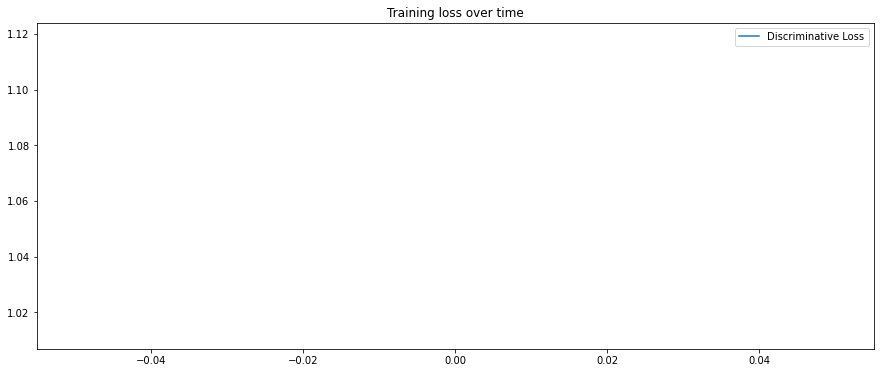

10 [D loss: 0.596104, acc.: 67.58%] [G loss: 1.065450]


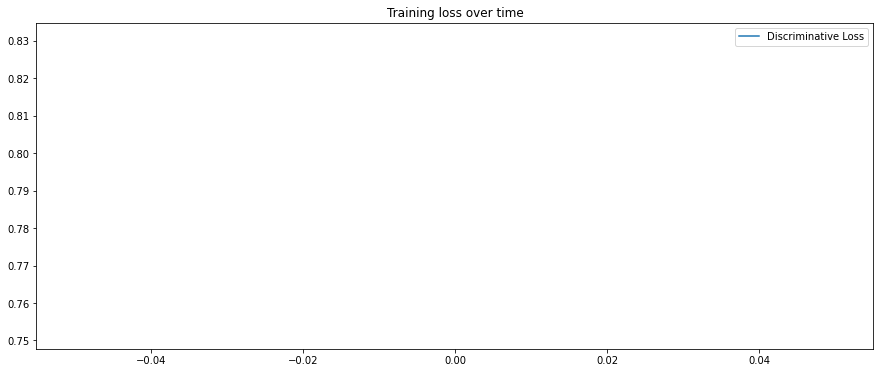

11 [D loss: 0.712645, acc.: 58.20%] [G loss: 0.791293]


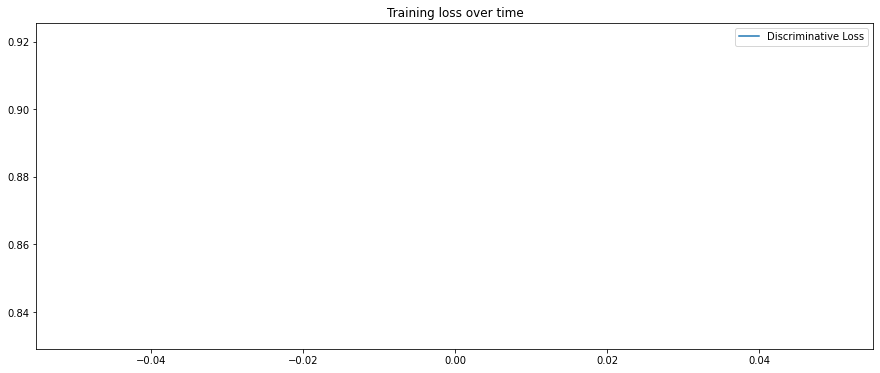

12 [D loss: 0.708589, acc.: 60.94%] [G loss: 0.877367]


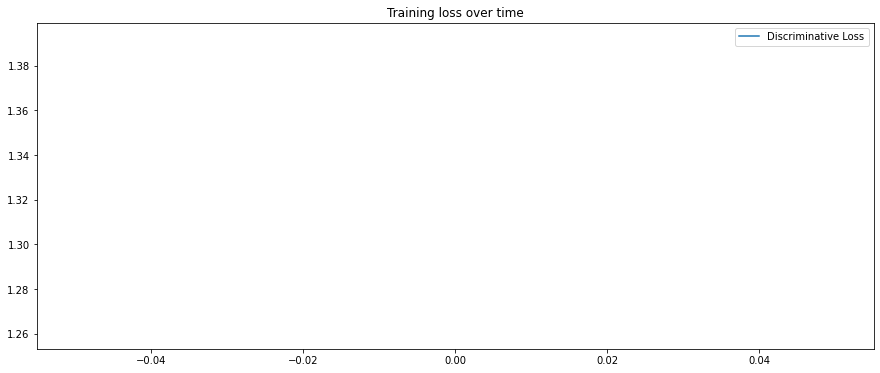

13 [D loss: 0.999505, acc.: 47.27%] [G loss: 1.326257]


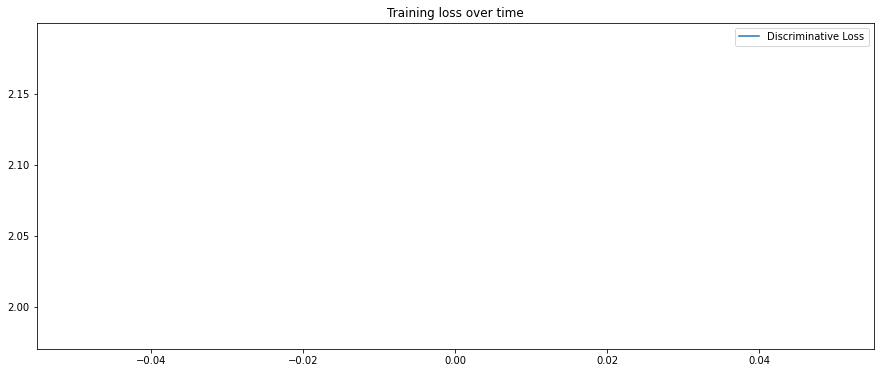

14 [D loss: 1.098098, acc.: 35.55%] [G loss: 2.085210]


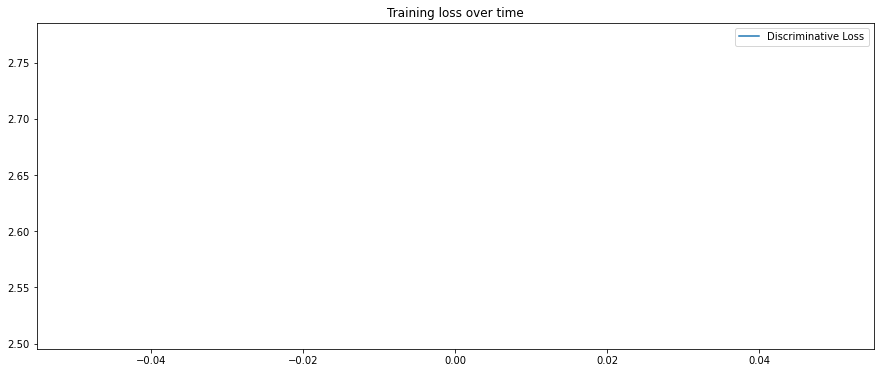

15 [D loss: 0.921059, acc.: 47.66%] [G loss: 2.640517]


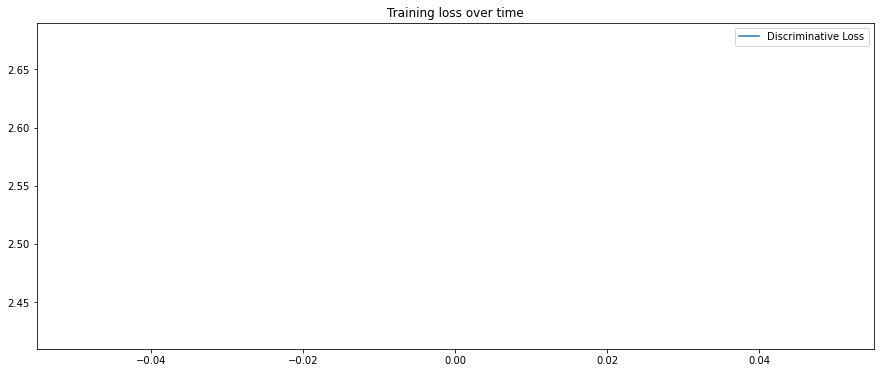

16 [D loss: 0.758011, acc.: 60.55%] [G loss: 2.549953]


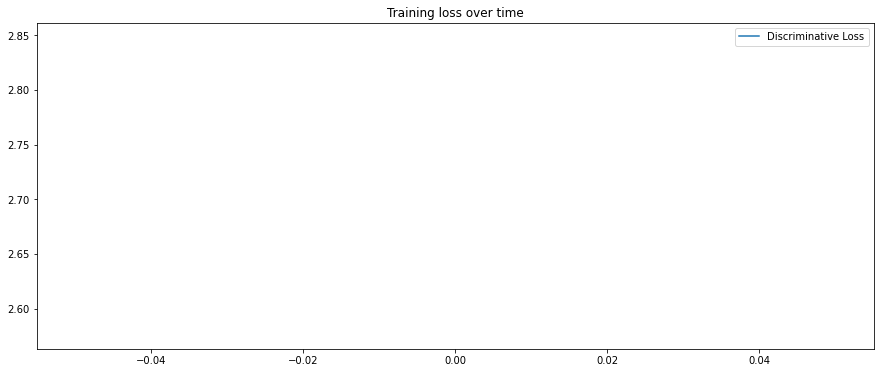

17 [D loss: 0.647804, acc.: 65.23%] [G loss: 2.712383]


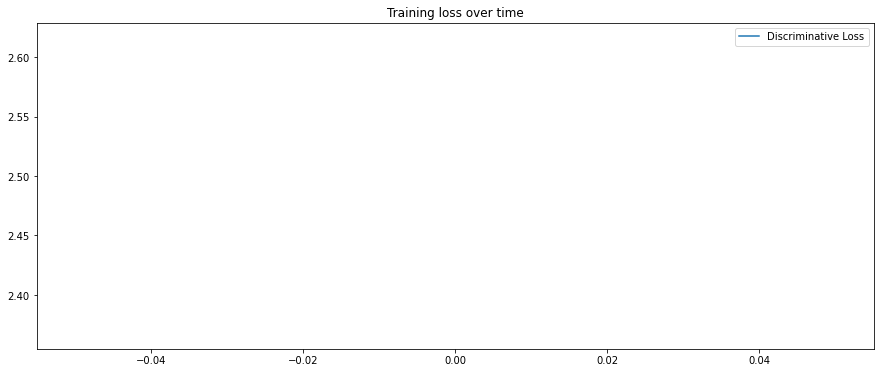

18 [D loss: 0.629516, acc.: 67.97%] [G loss: 2.491834]


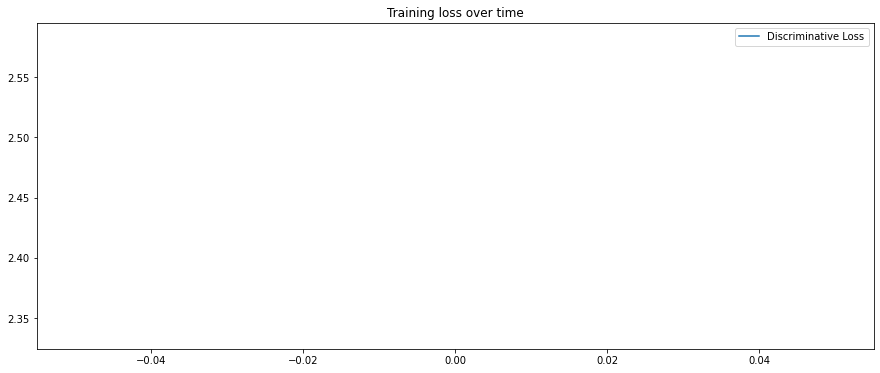

19 [D loss: 0.701160, acc.: 61.33%] [G loss: 2.459776]


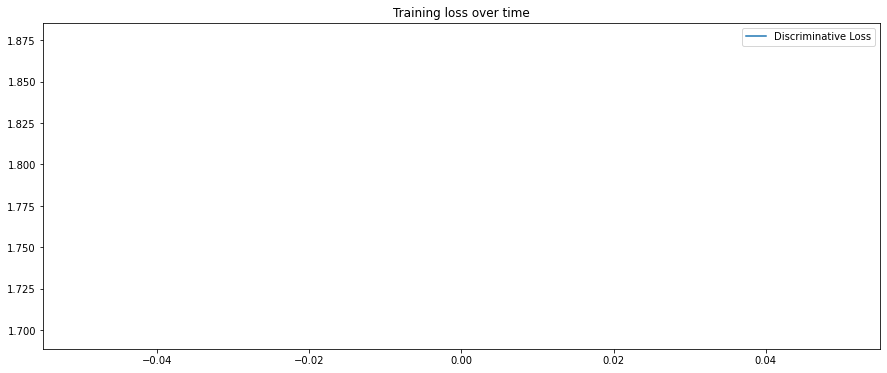

20 [D loss: 0.832728, acc.: 51.17%] [G loss: 1.787204]


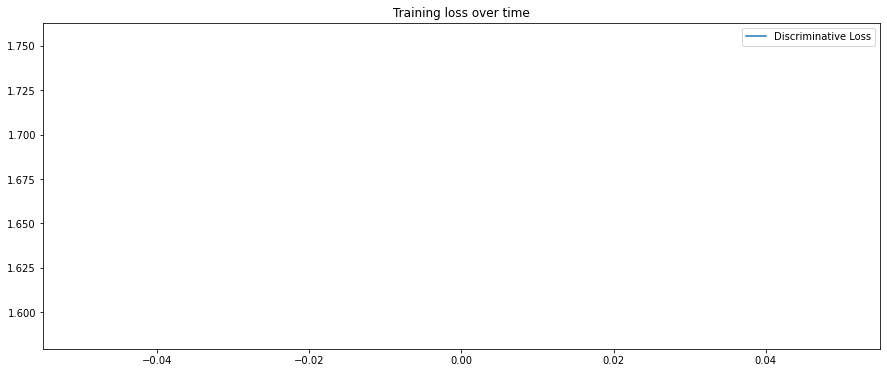

21 [D loss: 0.729142, acc.: 61.33%] [G loss: 1.671181]


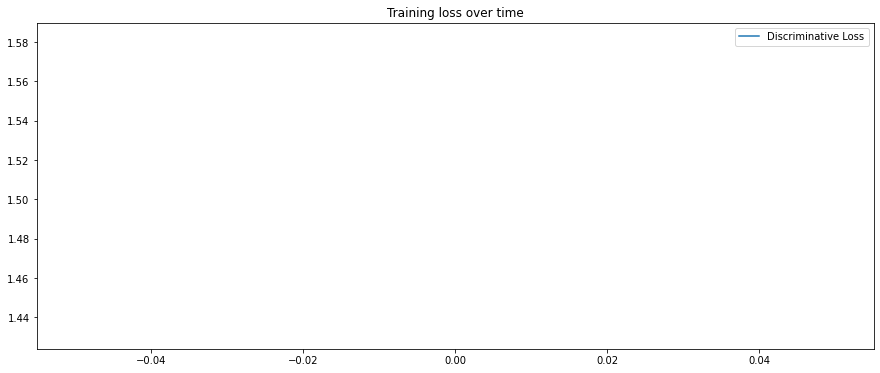

22 [D loss: 0.731520, acc.: 58.98%] [G loss: 1.506936]


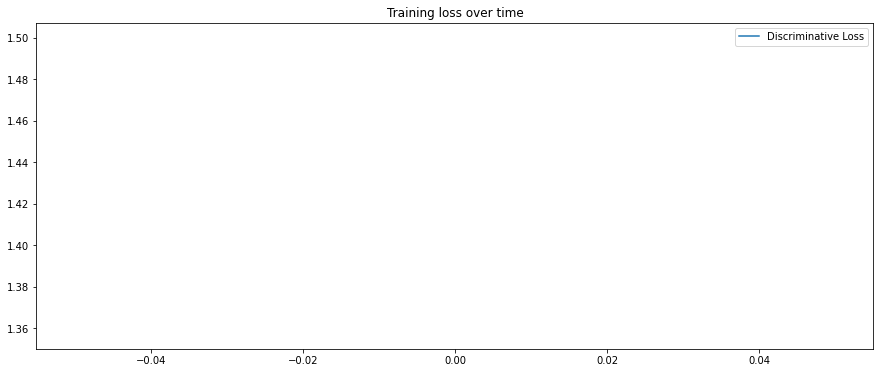

23 [D loss: 0.717417, acc.: 59.38%] [G loss: 1.428616]


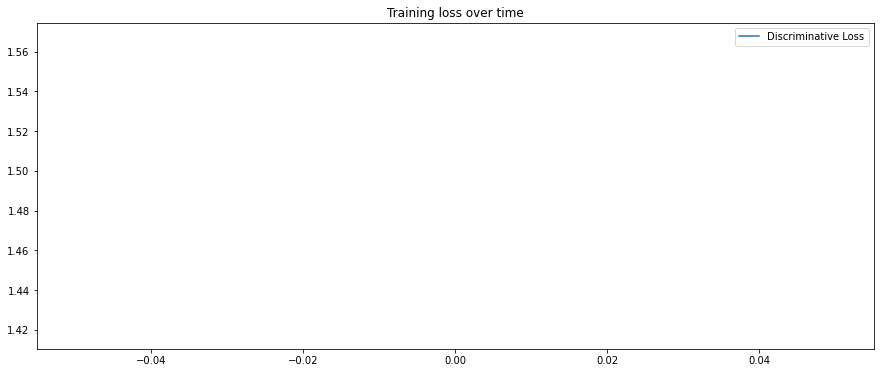

24 [D loss: 0.636465, acc.: 66.02%] [G loss: 1.492549]


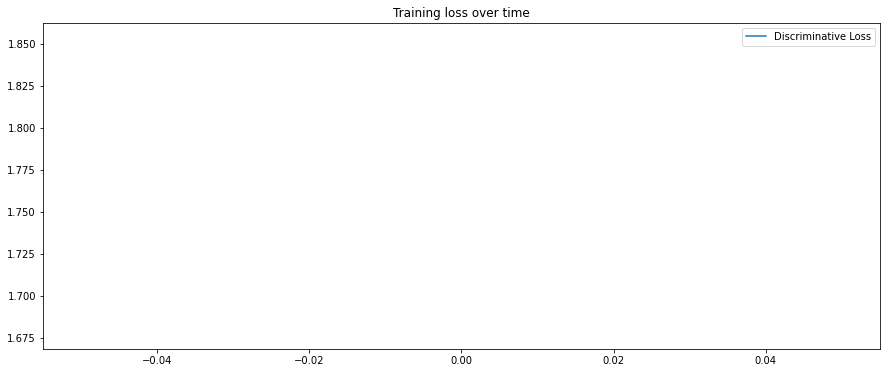

25 [D loss: 0.832442, acc.: 47.66%] [G loss: 1.765519]


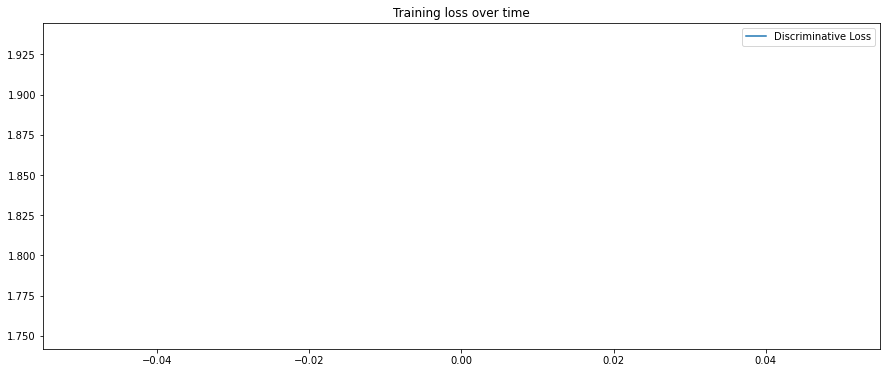

26 [D loss: 0.768035, acc.: 53.91%] [G loss: 1.843312]


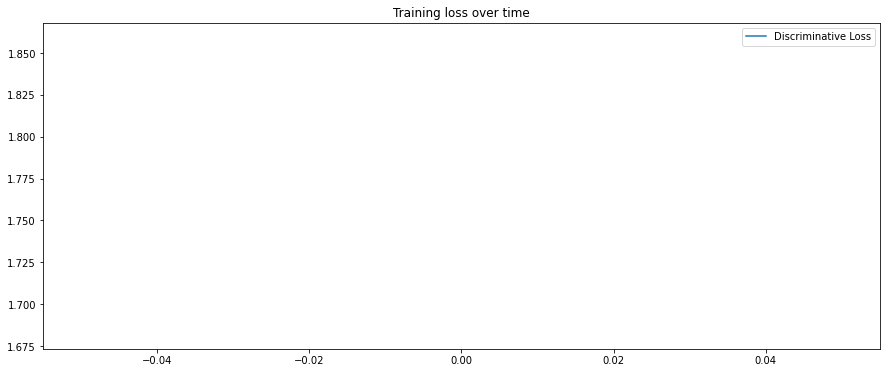

27 [D loss: 0.729174, acc.: 60.94%] [G loss: 1.770759]


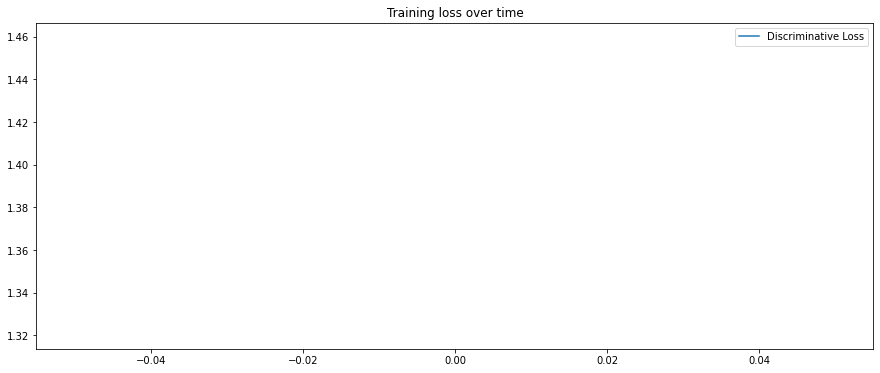

28 [D loss: 0.708865, acc.: 65.23%] [G loss: 1.390131]


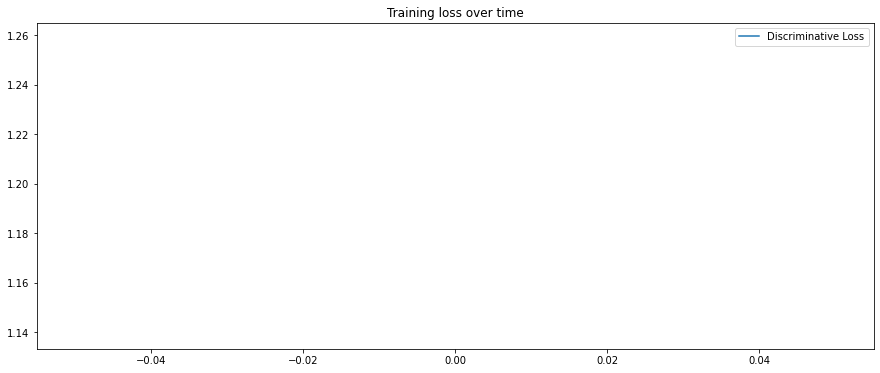

29 [D loss: 0.484135, acc.: 78.91%] [G loss: 1.199214]


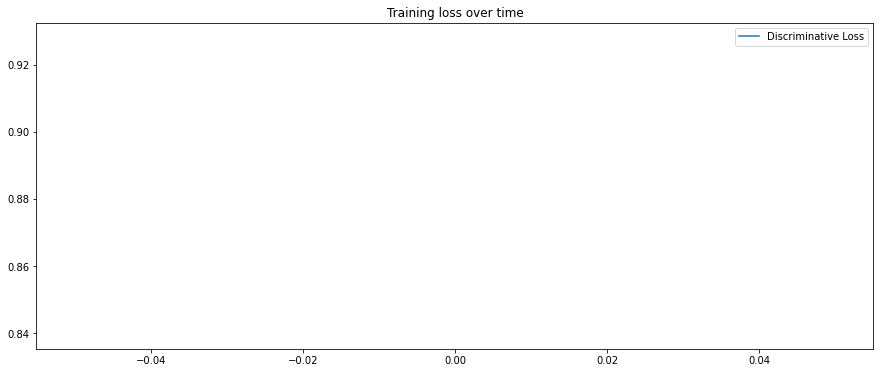

30 [D loss: 0.557727, acc.: 71.48%] [G loss: 0.883921]


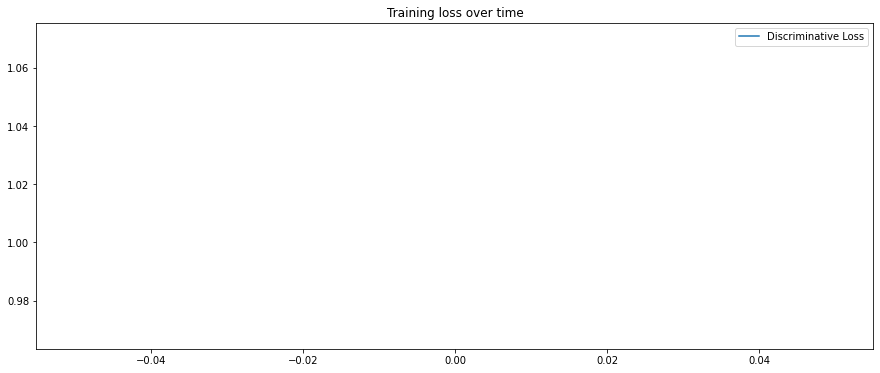

31 [D loss: 0.558008, acc.: 70.31%] [G loss: 1.019471]


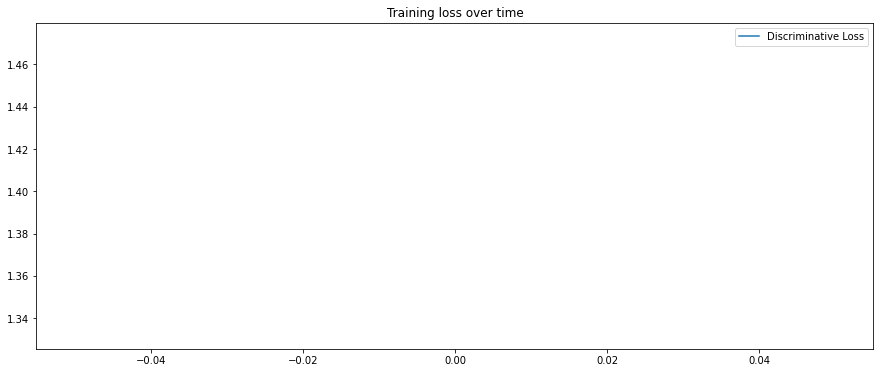

32 [D loss: 0.678682, acc.: 65.23%] [G loss: 1.402610]


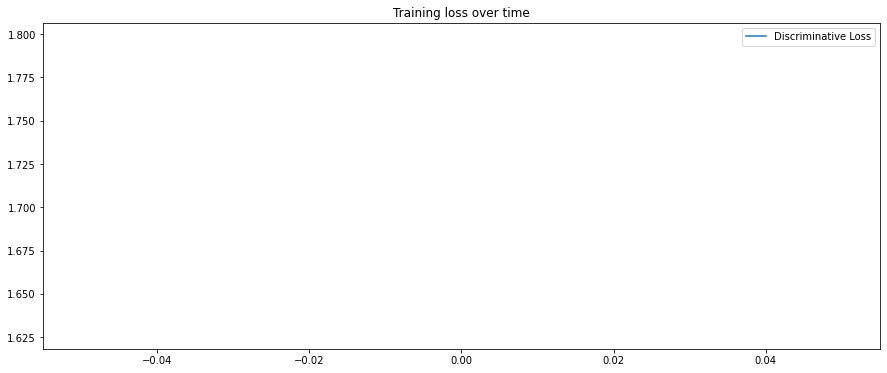

33 [D loss: 1.014267, acc.: 50.00%] [G loss: 1.712497]


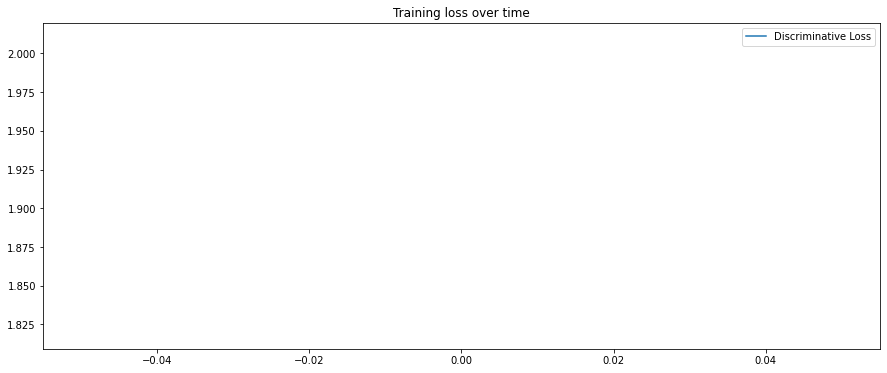

34 [D loss: 0.968084, acc.: 44.53%] [G loss: 1.914574]


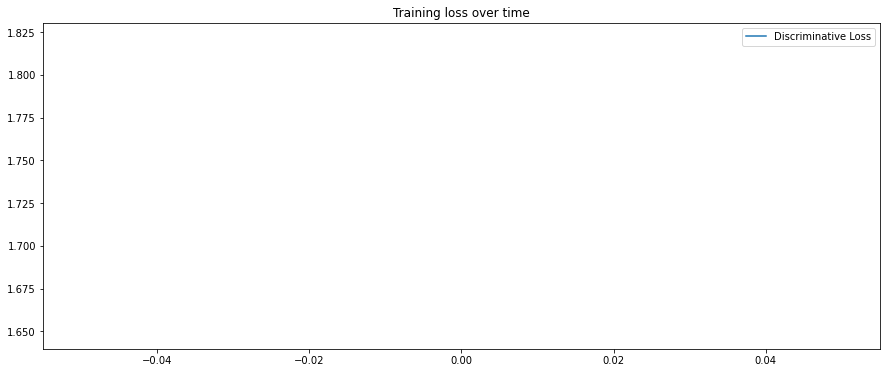

35 [D loss: 0.847917, acc.: 52.73%] [G loss: 1.735162]


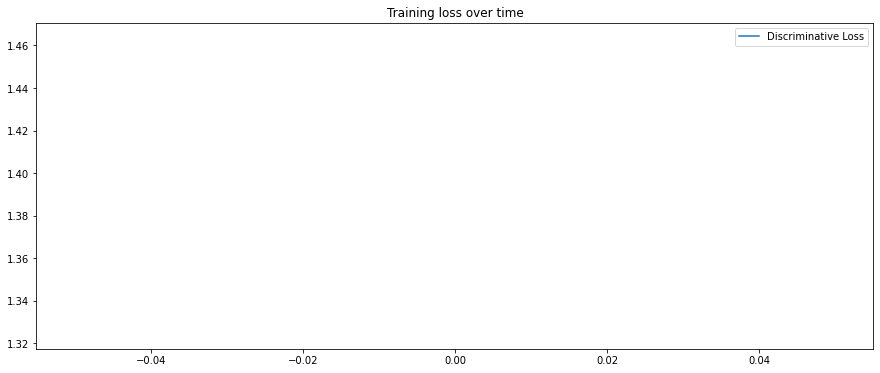

36 [D loss: 0.552132, acc.: 74.22%] [G loss: 1.394040]


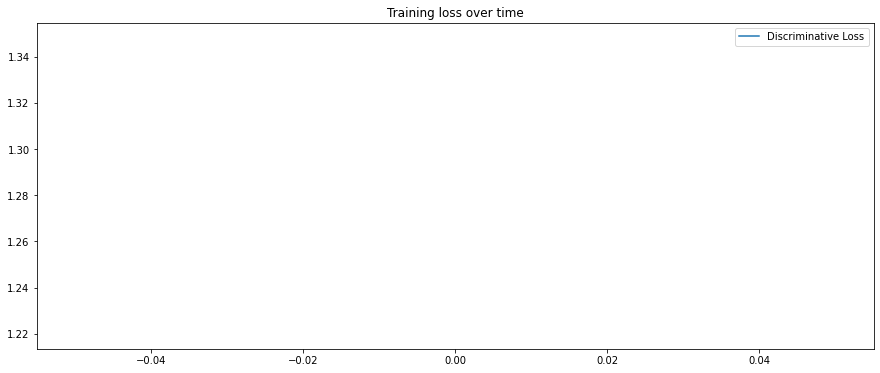

37 [D loss: 0.483384, acc.: 74.22%] [G loss: 1.284133]


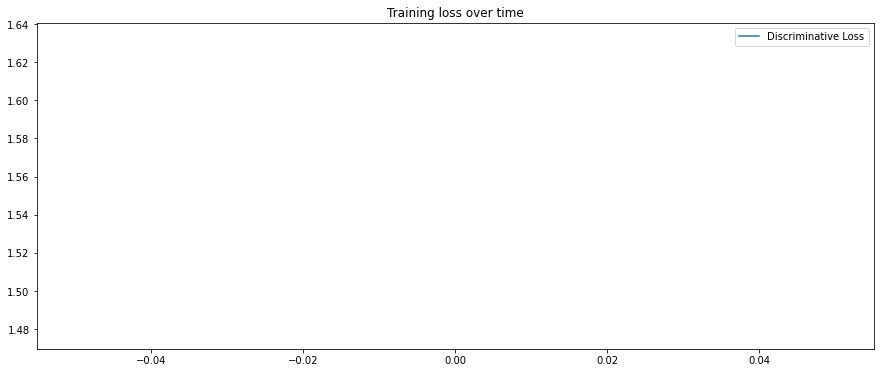

38 [D loss: 0.468451, acc.: 81.25%] [G loss: 1.555211]


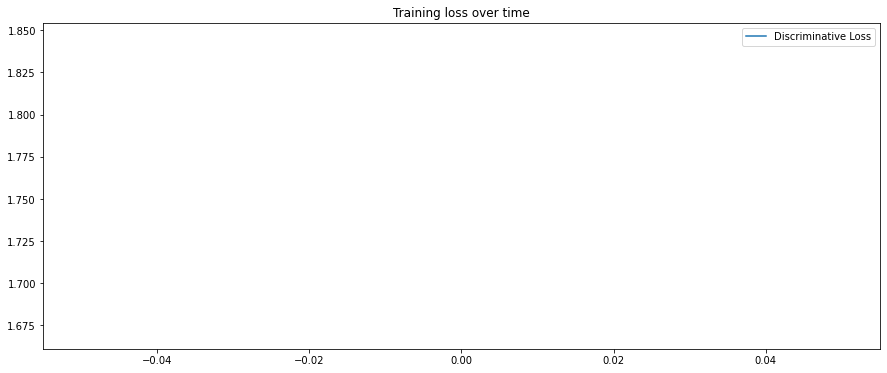

39 [D loss: 0.613179, acc.: 66.41%] [G loss: 1.757865]


In [ ]:
from __future__ import print_function, division

#from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        # (X_train, _), (_, _) = mnist.load_data()

        # # Rescale -1 to 1
        # X_train = X_train / 127.5 - 1.
        # X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------
            X_train = train_breast
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            ax, fig = plt.subplots(figsize=(15, 6))
            
            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

          

            
    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
        plt.show()
        
        


if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=4000, batch_size=128, save_interval=50)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs 

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)